This file uses .edf file as data source

# EDF data processing

Extracting EDF parameters from /Users/lejieliu/Documents/LucidDreamInduction/sample_data/E244GH55FX1U_1737280614000.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3661374  =      0.000 ... 29290.992 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: LF-FpZ, OTE_L-FpZ, RF-FpZ, OTE_R-FpZ
 chs: 4 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: 2025-01-19 16:56:54 UTC
 nchan: 4
 projs: []
 sfreq: 125.0 Hz
 subject_info: 3 items (dict)
>
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


/var/folders/68/l7xp6fns3w92gfhrl5cn9x940000gn/T/ipykernel_78069/1874644457.py:7: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


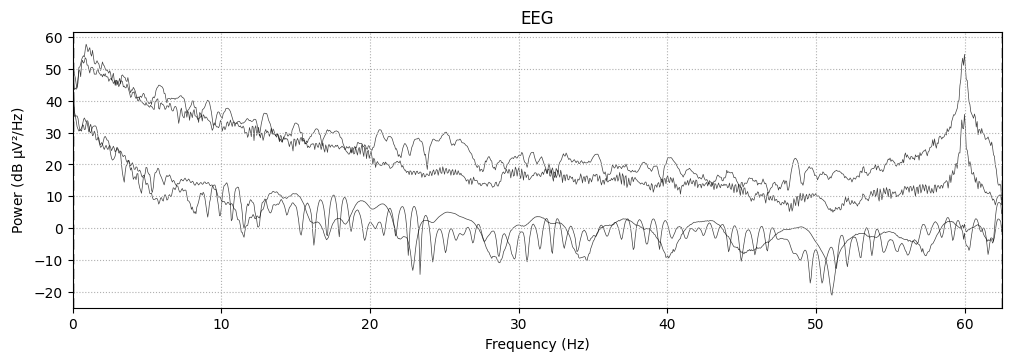

In [143]:
import mne
from mne.preprocessing import ICA

raw = mne.io.read_raw_edf("/Users/lejieliu/Documents/LucidDreamInduction/sample_data/E244GH55FX1U_1737280614000.edf", preload=True)

print(raw.info)
raw.plot_psd()

Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


/var/folders/68/l7xp6fns3w92gfhrl5cn9x940000gn/T/ipykernel_78069/4108630121.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


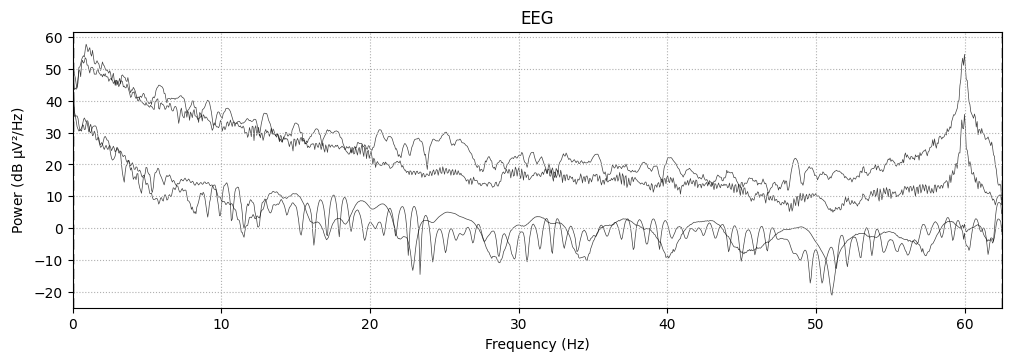

In [144]:
raw.compute_psd().plot()

In [145]:
raw.filter(l_freq=0.5, h_freq=40)
raw.notch_filter(freqs=60)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (6.600 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband ed

<RawEDF | E244GH55FX1U_1737280614000.edf, 4 x 3661375 (29291.0 s), ~111.7 MB, data loaded>

Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


/var/folders/68/l7xp6fns3w92gfhrl5cn9x940000gn/T/ipykernel_78069/4108630121.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd().plot()
/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


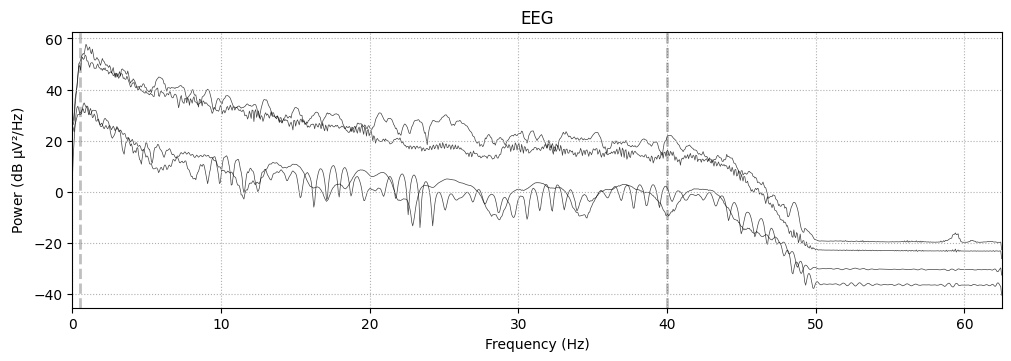

In [146]:
raw.compute_psd().plot()

## Detect whether the frequency has been influenced by the EOG and EMG

Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


/var/folders/68/l7xp6fns3w92gfhrl5cn9x940000gn/T/ipykernel_78069/3623999173.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.compute_psd(fmin=30, fmax = 60).plot()
/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


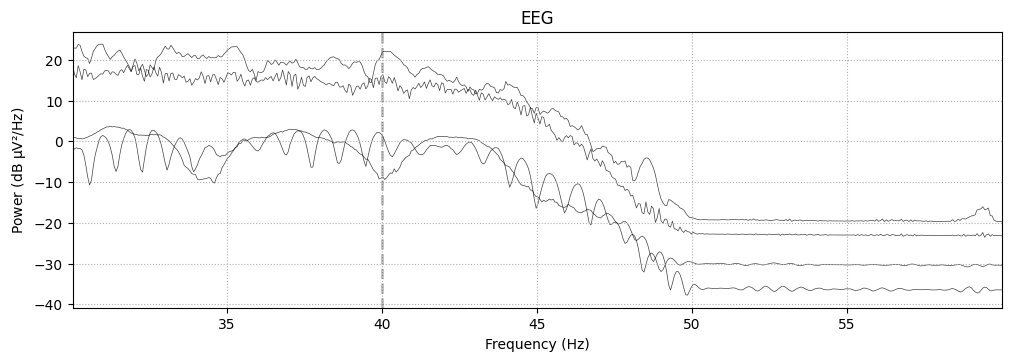

In [147]:
raw.compute_psd(fmin=30, fmax = 60).plot()

## Use ICA filter to remove the EOG

Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 5.7s.
Creating RawArray with float64 data, n_channels=4, n_times=3661375
    Range : 0 ... 3661374 =      0.000 ... 29290.992 secs
Ready.


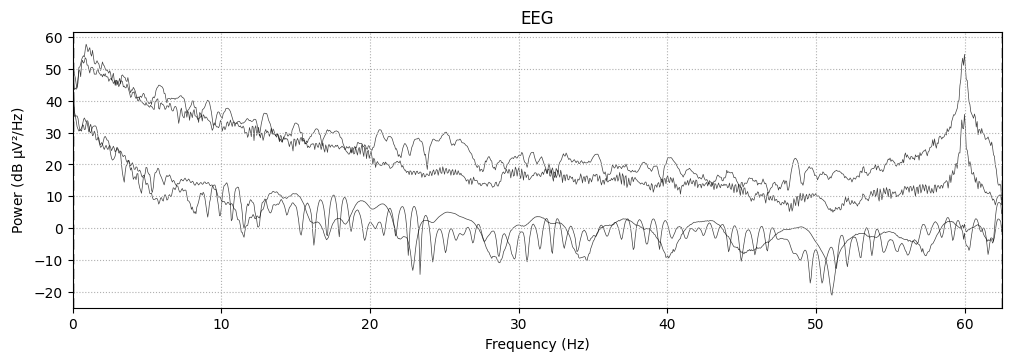

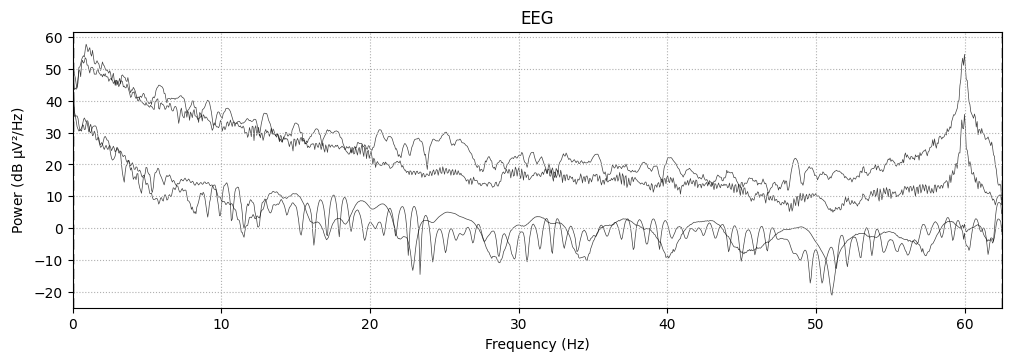

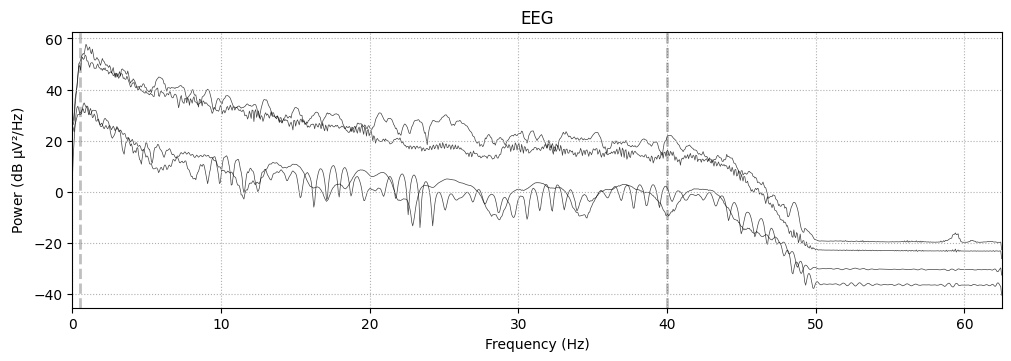

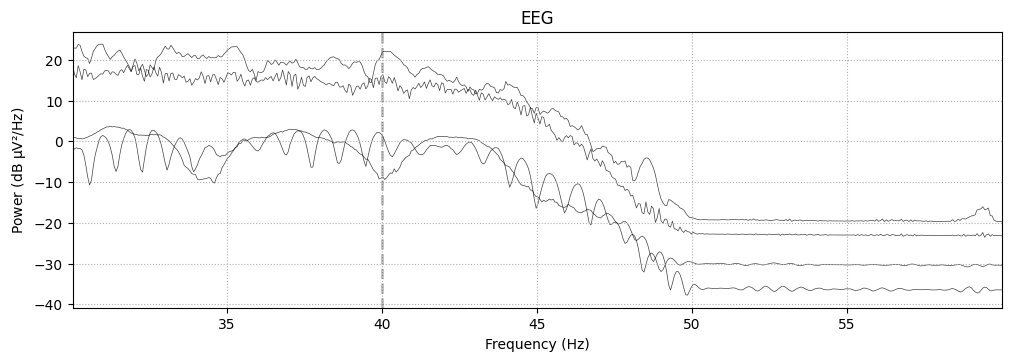

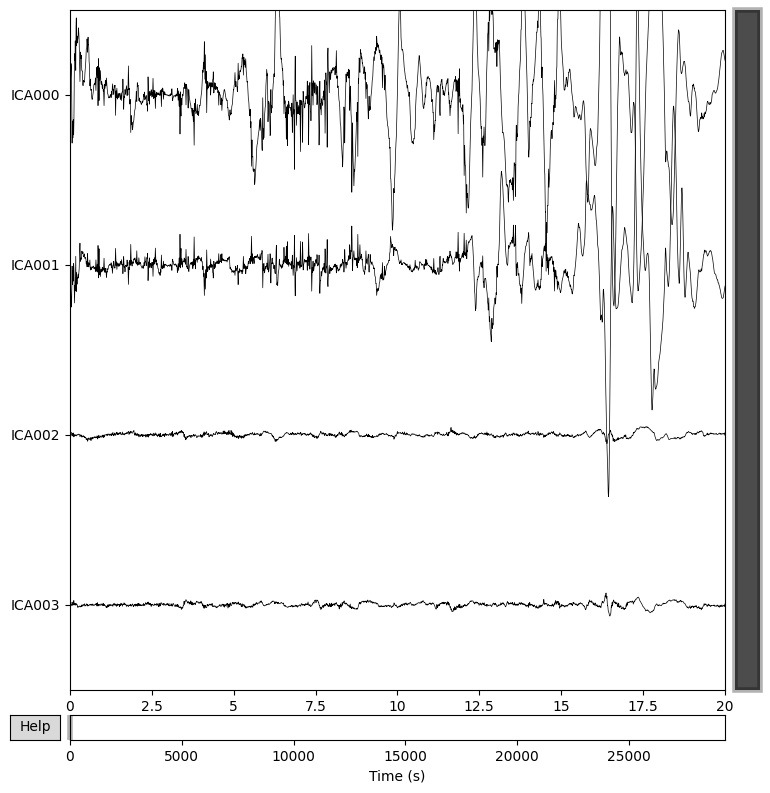

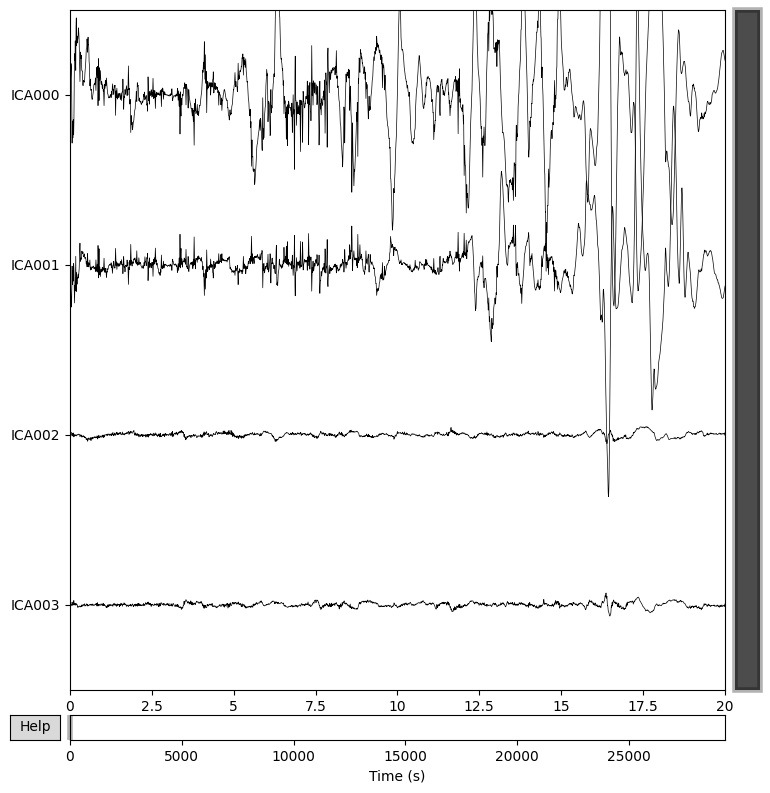

In [148]:
ica = ICA(n_components=4, random_state=97)
ica.fit(raw)
ica.plot_sources(raw)

## ICA clean process

In [149]:
ica.exclude = [0, 1]

ica.apply(raw)

Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 2 ICA components
    Projecting back using 4 PCA components


<RawEDF | E244GH55FX1U_1737280614000.edf, 4 x 3661375 (29291.0 s), ~111.7 MB, data loaded>

Effective window size : 16.384 (s)
Plotting power spectral density (dB=True).


/var/folders/68/l7xp6fns3w92gfhrl5cn9x940000gn/T/ipykernel_78069/2327585885.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd.plot()
/opt/anaconda3/envs/frenz-env/lib/python3.9/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


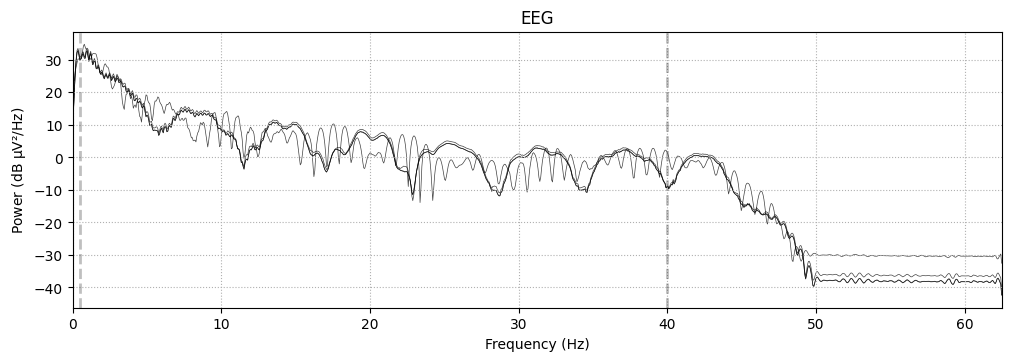

In [150]:
psd = raw.compute_psd()
psd.plot()

# Sliding Window Based Feature Extraction for Alertness

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_welch
from sklearn.preprocessing import MinMaxScaler

In [7]:
from mne.utils import use_log_level


In [153]:
tp = raw.get_data()

In [154]:
data = raw.get_data()  # shape: [n_channels, n_times]
sfreq = raw.info['sfreq']

win_sec = 10 # window length in seconds
step_sec = 3 # step size in seconds

n_win_samples = int(win_sec * sfreq)
n_step_samples = int(step_sec * sfreq)

features_over_time = []

for start in range(0, data.shape[1] - n_win_samples, n_step_samples):
    segment = data[:, start:start + n_win_samples]
    with use_log_level("ERROR"):
        psds, freqs = psd_array_welch(segment, sfreq=sfreq, fmin=1, fmax=40, n_fft=256)

    theta = psds[:, (freqs >= 4) & (freqs <= 8)].mean(axis=1)
    alpha = psds[:, (freqs >= 8) & (freqs <= 12)].mean(axis=1)
    beta  = psds[:, (freqs >= 13) & (freqs <= 30)].mean(axis=1)

    alpha_theta_ratio = alpha / (theta)
    beta_theta_ratio = beta / (theta)

    features_over_time.append({
        "start_time": start / sfreq,
        "theta": theta.mean(),
        "alpha": alpha.mean(),
        "beta": beta.mean(),
        "alpha_theta_ratio": alpha_theta_ratio.mean(),
        "beta_theta_ratio": beta_theta_ratio.mean()
    })


In [155]:
df_time_features = pd.DataFrame(features_over_time)

In [156]:
df_time_features[0:10]

,start_time,theta,alpha,beta,alpha_theta_ratio,beta_theta_ratio
0,0.0,1.430074e-12,6.706155e-13,6.416250e-13,0.490325,0.472502
1,3.0,2.325442e-12,5.593230e-13,5.105255e-13,0.239362,0.220260
2,6.0,1.688010e-12,8.374281e-13,4.399111e-13,0.520295,0.275732
3,9.0,6.537551e-12,1.011669e-12,5.874730e-13,0.156491,0.106375
4,12.0,2.717909e-12,8.882085e-13,4.333560e-13,0.325426,0.160635
5,15.0,1.147273e-10,2.678282e-11,1.123032e-12,0.231483,0.010015
6,18.0,2.935371e-10,4.879277e-11,6.971273e-12,0.113640,0.046457
7,21.0,1.863596e-10,3.536405e-11,3.674349e-12,0.194069,0.019502
8,24.0,5.408922e-12,2.024004e-12,2.453993e-12,0.430234,0.472390
9,27.0,1.141510e-11,1.028025e-12,9.890802e-13,0.208993,0.227891


In [ ]:
df = df_time_features.copy()

df['alpha_theta_smooth'] = df['alpha_theta_ratio'].rolling(window=3).mean()
df['beta_theta_smooth']  = df['beta_theta_ratio'].rolling(window=3).mean()


df['alert'] = (df['alpha_theta_smooth'] > 0.4) & (df['beta_theta_smooth'] > 0.3)
df['alert_int'] = df['alert'].astype(float)

df['alertness_score_ema'] = df['alert_int'].ewm(span=10, adjust=False).mean()


## Read sleep stage data (.csv) for alertness score qualification

In [165]:
file_path = '/Users/lejieliu/Documents/LucidDreamInduction/sample_data/E244GH55FX1U_1737280614000.csv'
data = pd.read_csv(file_path)

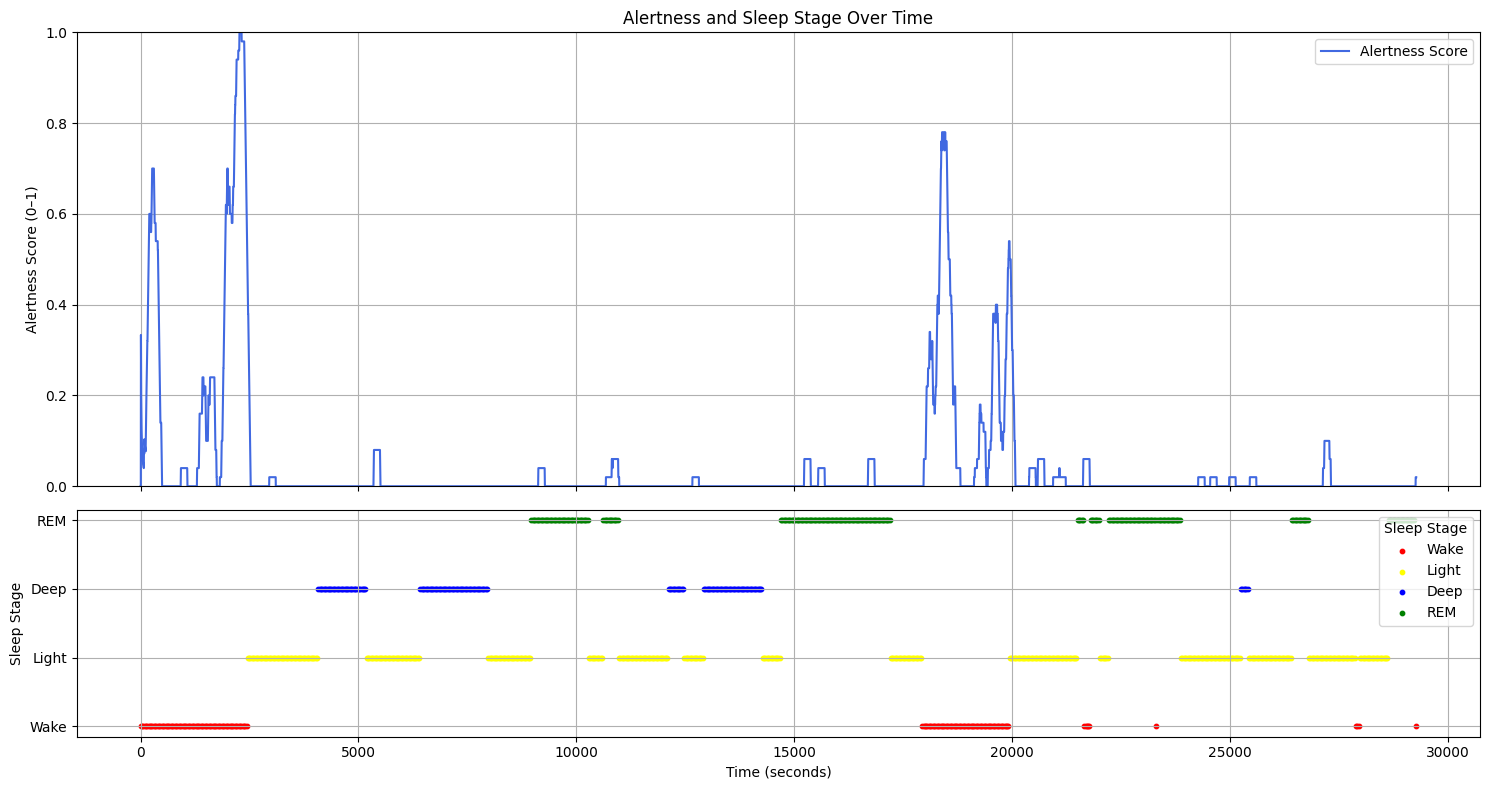

In [167]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 8), gridspec_kw={'height_ratios': [2, 1]})

# ==== Alertness Score ====
ax1.plot(df['start_time'], df['alertness_score'], linestyle='-', color='royalblue', label='Alertness Score')
ax1.set_ylabel("Alertness Score (0–1)")
ax1.set_title("Alertness and Sleep Stage Over Time")
ax1.set_ylim(0, 1)
ax1.grid(True)
ax1.legend(loc='upper right')

# ==== Sleep Stage ====
data['Relative Time'] = (data['Timestamp'] - data['Timestamp'].iloc[0])  

stage_colors = {
    'Wake': 'red',
    'Light': 'yellow',
    'Deep': 'blue',
    'REM': 'green'
}

for stage, color in stage_colors.items():
    stage_data = data[data['Sleep stage'] == stage]
    ax2.scatter(stage_data['Relative Time'], [stage] * len(stage_data), color=color, label=stage, s=10)

ax2.set_xlabel("Time (seconds)")
ax2.set_ylabel("Sleep Stage")
ax2.legend(title='Sleep Stage', loc='upper right')
ax2.grid(True)

plt.tight_layout()
plt.show()


# Data Test

In [17]:
file_path = 'recorded_data/ALERTNESS_3minmark_1/custom_combined_data.dat'

In [42]:
data = np.fromfile(file_path, dtype = np.float32)

data = data.reshape(-1, 8)

eeg_data = data[:2000, :4].transpose()

In [43]:
data.shape

(23250, 8)

In [44]:
eeg_data.shape

(4, 2000)

In [45]:
import numpy as np
import pandas as pd
from mne.time_frequency import psd_array_welch
from mne.utils import use_log_level

def compute_alertness_score(data, sfreq=125, win_sec=10, step_sec=3, n_fft=256):
    """
    Compute alertness features and score from EEG data using sliding window PSD analysis.

    Parameters:
    - data: EEG array with shape (n_channels, n_times)
    - sfreq: Sampling frequency (Hz)
    - win_sec: Window size in seconds for each PSD segment
    - step_sec: Step size between windows (sliding window)
    - n_fft: Number of FFT points used in Welch method

    Returns:
    - df: DataFrame containing time-based features and alertness score
    - latest_score: Most recent alertness score (float)
    """
    n_win_samples = int(win_sec * sfreq)
    n_step_samples = int(step_sec * sfreq)
    features_over_time = []

    for start in range(0, data.shape[1] - n_win_samples, n_step_samples):
        segment = data[:, start:start + n_win_samples]

        with use_log_level("ERROR"):
            psds, freqs = psd_array_welch(segment, sfreq=sfreq, fmin=1, fmax=40, n_fft=n_fft)

        theta = psds[:, (freqs >= 4) & (freqs <= 8)].mean(axis=1)
        alpha = psds[:, (freqs >= 8) & (freqs <= 12)].mean(axis=1)
        beta  = psds[:, (freqs >= 13) & (freqs <= 30)].mean(axis=1)

        alpha_theta_ratio = alpha / (theta + 1e-6)
        beta_theta_ratio  = beta / (theta + 1e-6)

        features_over_time.append({
            "start_time": start / sfreq,
            "theta": theta.mean(),
            "alpha": alpha.mean(),
            "beta": beta.mean(),
            "alpha_theta_ratio": alpha_theta_ratio.mean(),
            "beta_theta_ratio": beta_theta_ratio.mean()
        })

    # Convert to DataFrame
    df = pd.DataFrame(features_over_time)

    # Smooth the alpha/theta and beta/theta ratios with a moving average
    df['alpha_theta_smooth'] = df['alpha_theta_ratio'].rolling(window=3).mean()
    df['beta_theta_smooth']  = df['beta_theta_ratio'].rolling(window=3).mean()

    # Define alertness condition: both smoothed ratios above thresholds
    df['alert'] = (df['alpha_theta_smooth'] > 0.4) & (df['beta_theta_smooth'] > 0.3)

    # Compute rolling average of alert flag to get a continuous score
    df['alertness_score'] = df['alert'].rolling(window=20, min_periods=1).mean()

    # Get the latest alertness score
    latest_score = df['alertness_score'].iloc[-1] if not df.empty else np.nan

    return df, latest_score


In [46]:
df, latest_score = compute_alertness_score(eeg_data, sfreq=126, win_sec=10, step_sec=1, n_fft=256)

/Users/suryaven/Documents/code/uni/neurotech/frenztoolkit/.venv/lib/python3.9/site-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 256 is greater than input length  = 188, using nperseg = 188
  return _func(*args, **kwargs)
/Users/suryaven/Documents/code/uni/neurotech/frenztoolkit/.venv/lib/python3.9/site-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 256 is greater than input length  = 188, using nperseg = 188
  return _func(*args, **kwargs)
/Users/suryaven/Documents/code/uni/neurotech/frenztoolkit/.venv/lib/python3.9/site-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 256 is greater than input length  = 188, using nperseg = 188
  return _func(*args, **kwargs)
/Users/suryaven/Documents/code/uni/neurotech/frenztoolkit/.venv/lib/python3.9/site-packages/mne/time_frequency/psd.py:257: UserWarning: nperseg = 256 is greater than input length  = 135, using nperseg = 135
  return _func(*args, **kwargs)
/Users/suryaven/Documents/code/uni/neurotech